# Best Response Dynamics

Author: Yuya Furusawa

*Graduate School of Economics, University of Tokyo*

This note demonstrates the best response dynamics model and its related models with `brd.jl` Julia library.

In [1]:
include("brd.jl")
using Plots
gr()

Plots.GRBackend()

## Best Response Dynamics

In evolutionary game theory, best response dynamics represents a class of strategy updating rules, where each player's strategy in the next round is determined by their best response to subset of population.

## Kandori-Mailath-Rob model (KMR model)

Kandori, Mailath and Rob(1993) considrs the evolution model with noises or mutations.

### Coordination Game

In [2]:
coordination_game_matrix = [2 0; 0 1]
N = 10
epsilon = 0.1
kmr = KMR(coordination_game_matrix, N, epsilon)

KMR{Int64}(10, 2×2 Player{2,Int64}:
 2  0
 0  1, 2, 0.1)

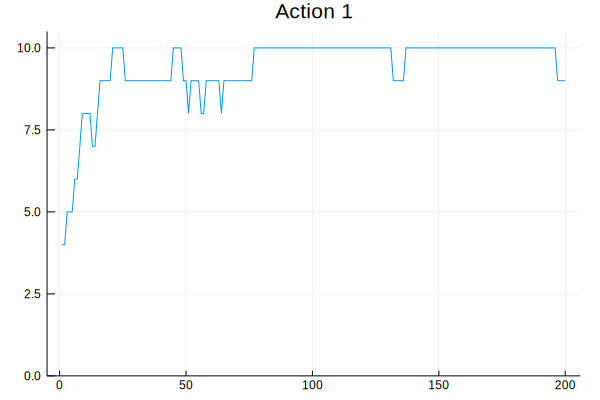

In [3]:
ts_length = 200
m = 4
x = time_series(kmr, ts_length, [m, N-m])

plot(x[1, :], ylim=(0, 10.5), title="Action 1", legend=false)

In [4]:
ts_length = 150000
m = 4
y = time_series(kmr, ts_length, [m, N-m])

plot(y[2, :], ylim=(0, 10.5), title="Action 2", legend=false)

## Sampling Best Response Dynamics

### Coordination Games

In [5]:
coordination_game_matrix = [4 0; 3 2]
N = 20
k = 2
sbrd0 = SamplingBRD(coordination_game_matrix, N, k)

SamplingBRD{Int64}(20, 2×2 Player{2,Int64}:
 4  0
 3  2, 2, 2)

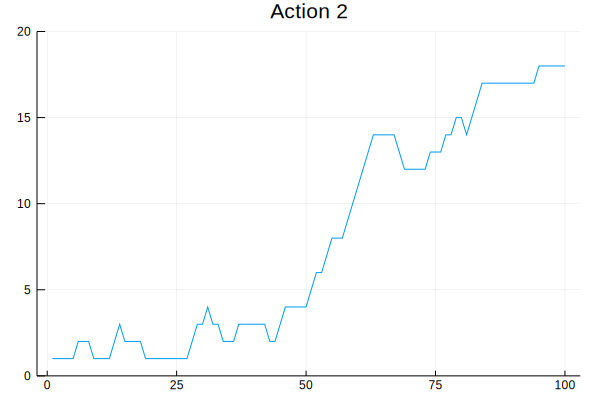

In [6]:
ts_length = 100
m = 1
x = time_series(sbrd0, ts_length, [N-m, m])

plot(x[2, :], ylim=(0, N), title="Action 2", legend=false)

### Young's Game

In [7]:
young_game_matrix = [6 0 0; 5 7 5; 0 5 8]
N = 20
k = 2
sbrd1 = SamplingBRD(young_game_matrix, N, k)

SamplingBRD{Int64}(20, 3×3 Player{2,Int64}:
 6  0  0
 5  7  5
 0  5  8, 3, 2)

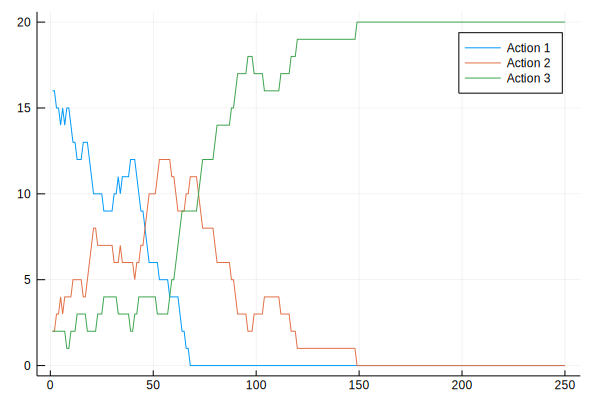

In [8]:
ts_length = 250
m = 2
y = time_series(sbrd1, ts_length, [N-2*m, m, m])
labels = ["Action 1", "Action 2", "Action 3"]
plot([y[1, :], y[2, :], y[3, :]], label=labels)

---

## Reference

- Kandori, Mailath and Rob(1993), "Learning, Mutation, and Long Run Equilibria in Games.", Econometrica, vol.61, No.1, 26-59
- Oyama, Sandholm and Tercieux(2015), "Sampling best response dynamics and deterministic equilibirum selection", Theoretical Economics, 10, 243-281